In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Flamingodata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\Flamingo 2001-2020.csv")
Flamingodata = Flamingodata[["OBSERVATION COUNT","COUNTRY","LATITUDE","LONGITUDE","OBSERVATION DATE"]]
Flamingodata.columns = pd.Index(["Count","Country","Lat","Long","Date"])


In [43]:
Flamingodata = Flamingodata.drop(index=[3557,6058,2853,4265])
Flamingodata = Flamingodata[Flamingodata["Count"]!="X"]
Flamingodata["Count"] = Flamingodata["Count"].astype("Float32")

In [44]:
Flamingodata["Date"]=pd.to_datetime(Flamingodata["Date"],dayfirst=True)

In [45]:
Flamingodata.set_index("Date")[["Count"]].resample("M").sum()

,Count
Date,
2001-01-31,16593.0
2001-02-28,18738.0
2001-03-31,9307.0
2001-04-30,96102.0
2001-05-31,94807.0
...,...
2020-02-29,310567.0
2020-03-31,127968.0
2020-04-30,32827.0


Text(0.5, 0, 'Year')

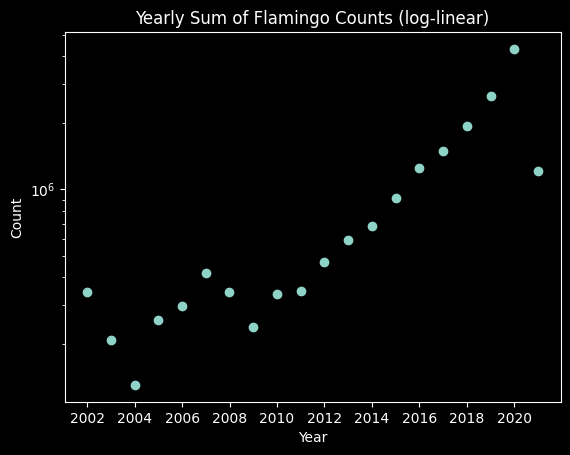

In [46]:
plt.scatter(x=Flamingodata.set_index("Date")["Count"].resample("Y").sum().index,y=Flamingodata.set_index("Date")["Count"].resample("Y").sum().values)
plt.title("Yearly Sum of Flamingo Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")

data before 1960 should really be truncated

In [47]:
Flamingodata[(Flamingodata["Date"]>"1960-01-01")].set_index("Date")["Count"].resample("Y").sum().index.year

Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='int32', name='Date')

log curve reveals exponential rise at around 1960

In [48]:
np.polyfit(x=Flamingodata[(Flamingodata["Date"]>"1960-01-01")].set_index("Date")["Count"].resample("Y").sum().index.year.to_numpy(),
y=Flamingodata[(Flamingodata["Date"]>"1960-01-01")].set_index("Date")["Count"].resample("Y").sum().to_numpy(),deg=1)

array([ 1.30756414e+05, -2.61962904e+08])

log(y) = 130756 - 261962904

Text(0.5, 0, 'Year')

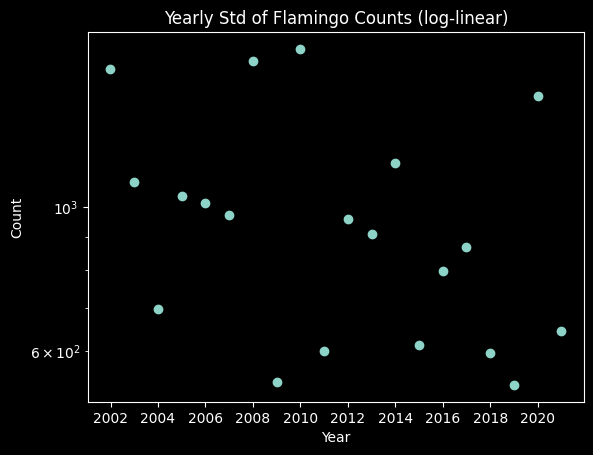

In [49]:
plt.scatter(x=Flamingodata.set_index("Date")["Count"].resample("Y").std().index,y=Flamingodata.set_index("Date")["Count"].resample("Y").std().values)
plt.title("Yearly Std of Flamingo Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

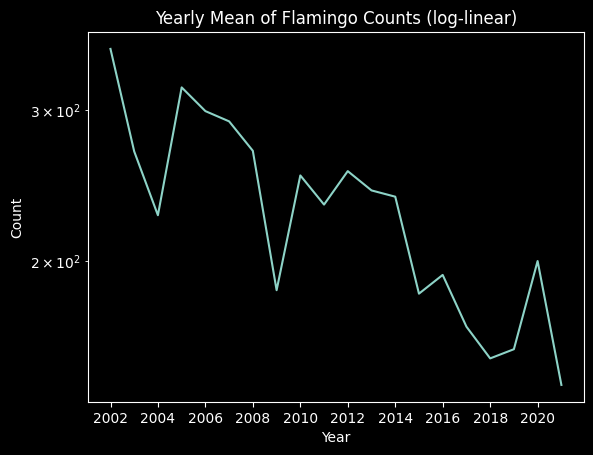

In [50]:
plt.plot(Flamingodata.set_index("Date")["Count"].resample("Y").mean().fillna(method="bfill"))
plt.title("Yearly Mean of Flamingo Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")


Text(0, 0.5, 'Count')

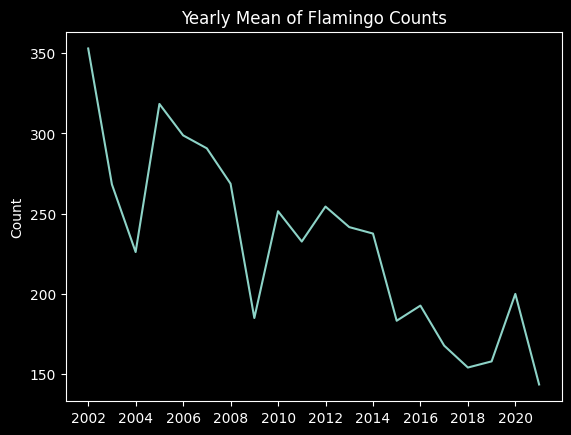

In [51]:
plt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("Y").mean().fillna(method="bfill"))
plt.title("Yearly Mean of Flamingo Counts")

plt.ylabel("Count")



(np.float64(12000.0),
 np.float64(16000.0),
 np.float64(100.0),
 np.float64(1000000.0))

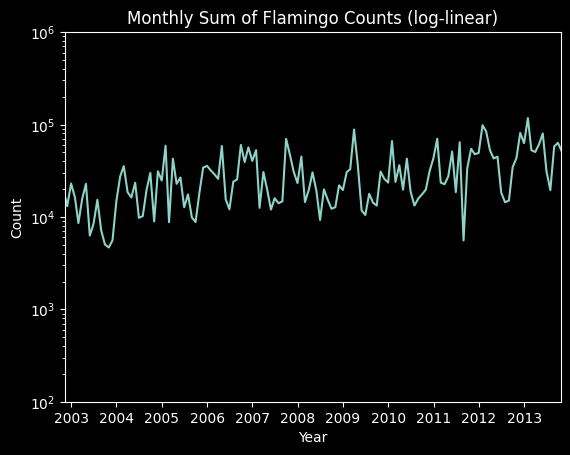

In [52]:
plt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").sum().fillna(method="bfill"))
plt.title("Monthly Sum of Flamingo Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")
plt.axis([12000,16000,100,1000000])

Strong seasonal behaviour

(array([14061., 14153., 14245., 14335., 14426., 14518., 14610., 14700.,
        14791., 14883., 14975.]),
 [Text(14061.0, 0, '2008-07'),
  Text(14153.0, 0, '2008-10'),
  Text(14245.0, 0, '2009-01'),
  Text(14335.0, 0, '2009-04'),
  Text(14426.0, 0, '2009-07'),
  Text(14518.0, 0, '2009-10'),
  Text(14610.0, 0, '2010-01'),
  Text(14700.0, 0, '2010-04'),
  Text(14791.0, 0, '2010-07'),
  Text(14883.0, 0, '2010-10'),
  Text(14975.0, 0, '2011-01')])

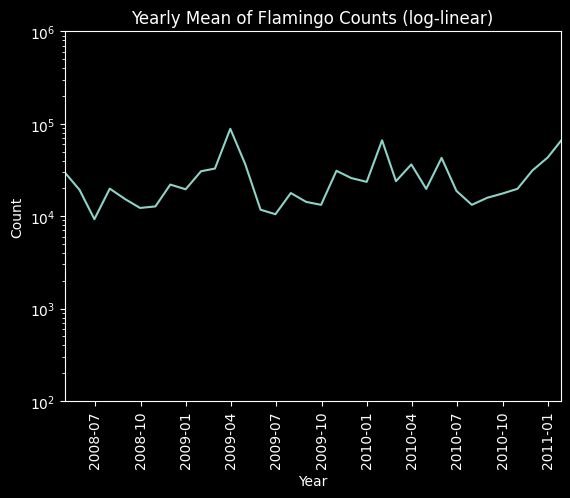

In [53]:
plt.plot(Flamingodata.set_index("Date")["Count"].resample("M").sum().fillna(method="bfill"))
plt.title("Yearly Mean of Flamingo Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")
plt.xlabel("Year")
plt.axis([14000,15000,100,1000000])
plt.xticks(rotation=90)

period of roughly 12 months

seems as though on month 10 (October) Flamingo count is lowest

on month 1 to 5 (January to May) they are at the highest

pretty constant throughout 2000 to 2024

Text(0, 0.5, 'Count')

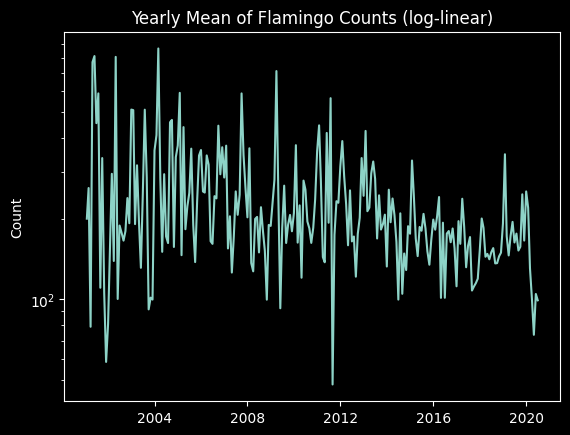

In [54]:
plt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))
plt.title("Yearly Mean of Flamingo Counts (log-linear)")
plt.yscale("log")
plt.ylabel("Count")



some what clear but weak trend, very clear seasonality

Text(0, 0.5, 'Count')

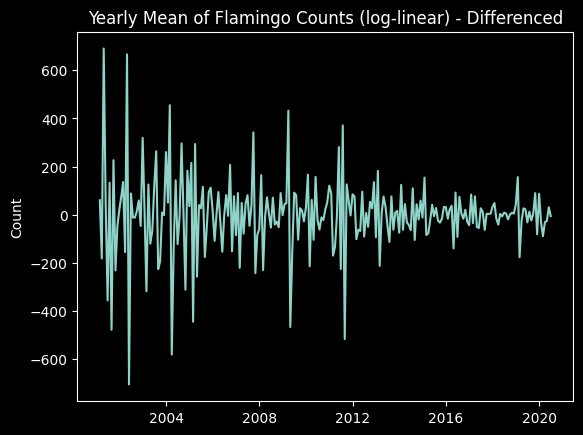

In [55]:
plt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])
plt.title("Yearly Mean of Flamingo Counts (log-linear) - Differenced")
plt.ylabel("Count")

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020'),
  Text(19723.0, 0, '2024')])

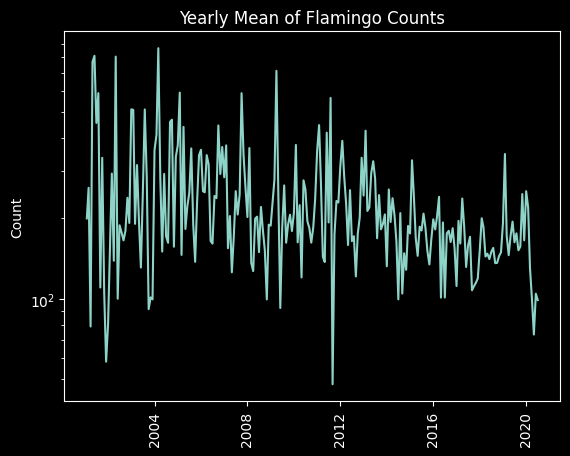

In [56]:
plt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))
plt.title("Yearly Mean of Flamingo Counts")
plt.yscale("log")
plt.ylabel("Count")
plt.xticks(rotation=90)

(array([10957., 12418., 13879., 15340., 16801., 18262., 19723.]),
 [Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020'),
  Text(19723.0, 0, '2024')])

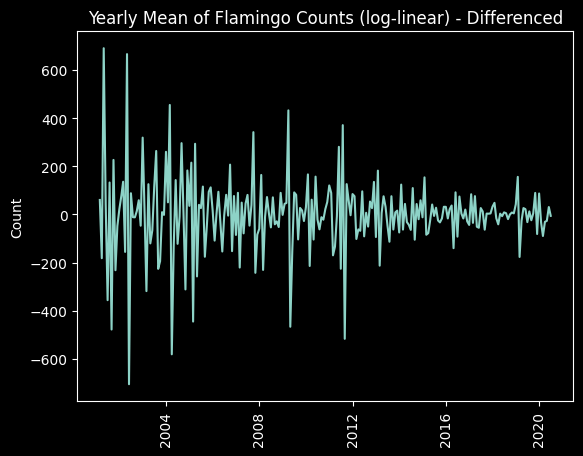

In [57]:
plt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])
plt.title("Yearly Mean of Flamingo Counts (log-linear) - Differenced")
plt.ylabel("Count")
#plt.axis([8000,13000,-6000,6000])
plt.xticks(rotation=90)

In [58]:
from statsmodels.tsa.stattools import adfuller 
import warnings
warnings.filterwarnings("ignore")

print("Adfuller before differencing: ",adfuller(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))[1].astype("float32"))
print("Adfuller after differencing: ",adfuller(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:])[1].astype("float32"))

Adfuller before differencing:  0.11297361
Adfuller after differencing:  6.9700906e-19


Text(0.5, 1.0, 'PACF Plot (Differenced)')

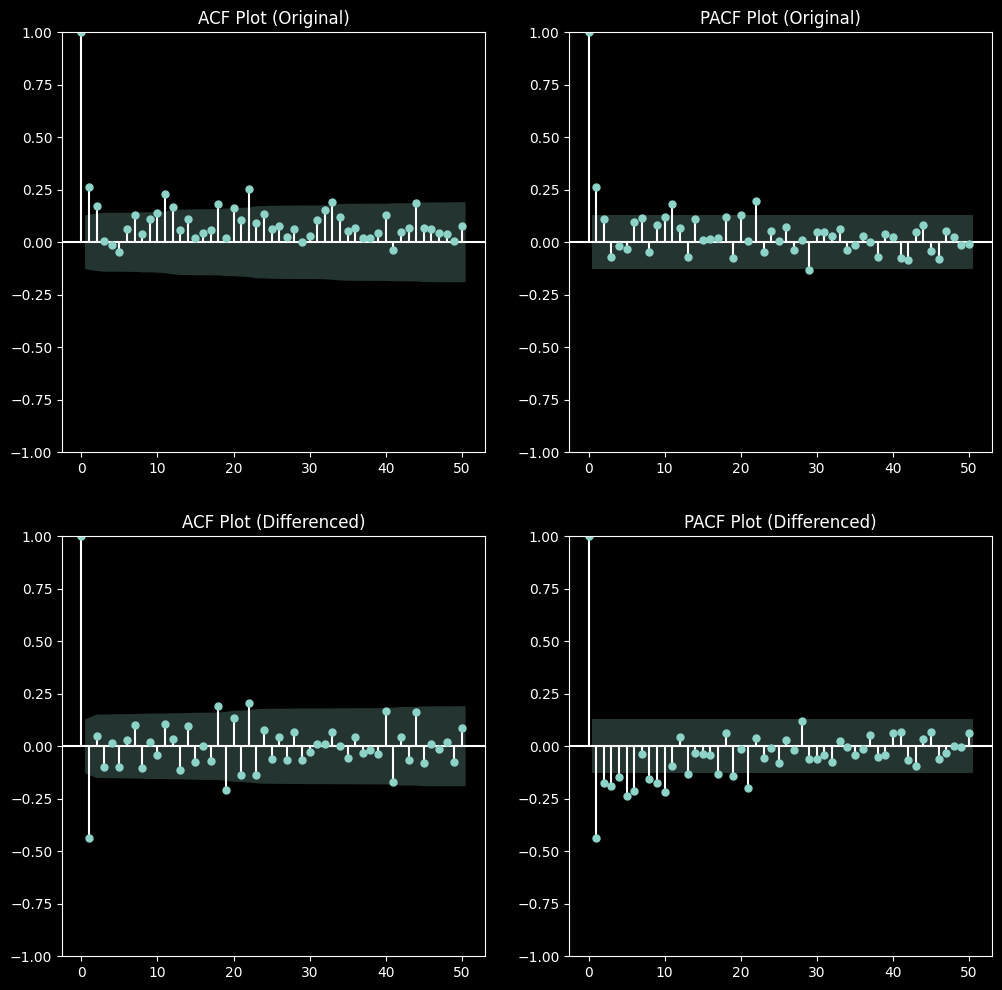

In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

y = Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")
dy = Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:]

fig,axs = plt.subplots(2,2,figsize=(12,12))

lag = 50

#Plot 3: ACF Plot of the original series
plot_acf(y,ax=axs[0,0],lags=lag)
axs[0,0].set_title("ACF Plot (Original)")

#Plot 4: PACF Plot of the original series
plot_pacf(y,ax=axs[0,1],lags=lag,method="ywm")
axs[0,1].set_title("PACF Plot (Original)")

#Plot 5: ACF Plot of the differenced series
plot_acf(dy,ax=axs[1,0],lags=lag)
axs[1,0].set_title("ACF Plot (Differenced)")

#Plot 6: PACF Plot of the differenced series
plot_pacf(dy,ax=axs[1,1],lags=lag,method="ywm")
axs[1,1].set_title("PACF Plot (Differenced)")

Large peak at 12

Seasonality component (1,1,1) [12] perhaps

Text(0.5, 1.0, 'PACF Plot (Differenced)')

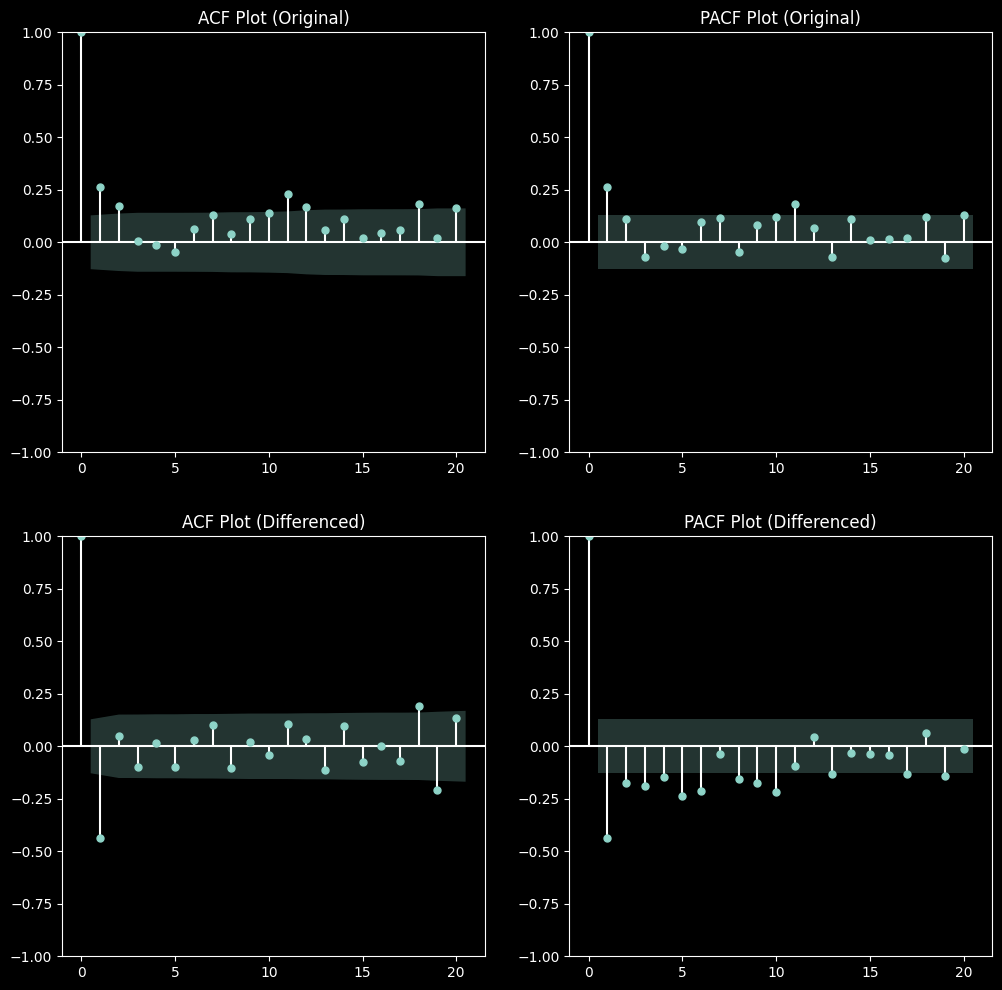

In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf    

y = Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")
dy = Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill").diff().iloc[1:]

fig,axs = plt.subplots(2,2,figsize=(12,12))

lag = 20

#Plot 3: ACF Plot of the original series
plot_acf(y,ax=axs[0,0],lags=lag)
axs[0,0].set_title("ACF Plot (Original)")

#Plot 4: PACF Plot of the original series
plot_pacf(y,ax=axs[0,1],lags=lag,method="ywm")
axs[0,1].set_title("PACF Plot (Original)")

#Plot 5: ACF Plot of the differenced series
plot_acf(dy,ax=axs[1,0],lags=lag)
axs[1,0].set_title("ACF Plot (Differenced)")

#Plot 6: PACF Plot of the differenced series
plot_pacf(dy,ax=axs[1,1],lags=lag,method="ywm")
axs[1,1].set_title("PACF Plot (Differenced)")

In [83]:
from statsmodels.tsa.arima.model import ARIMA

for d in [0,1]:
    for p in [2,3]:
        for q in [1,2]:
            model = ARIMA(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"),order = (p,d,q))
            results = model.fit()
            print(f"p= {p}, d= {d}, q= {q} | results = {round(results.aic,2)}")

p= 2, d= 0, q= 1 | results = 2936.61
p= 2, d= 0, q= 2 | results = 2935.43
p= 3, d= 0, q= 1 | results = 2938.36
p= 3, d= 0, q= 2 | results = 2930.56
p= 2, d= 1, q= 1 | results = 2917.55
p= 2, d= 1, q= 2 | results = 2918.16
p= 3, d= 1, q= 1 | results = 2914.6
p= 3, d= 1, q= 2 | results = 2909.43


lowest error at (p,d,q) at (2,1,1)

In [62]:
model = ARIMA(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"),order = (2,1,1))
results = model.fit()

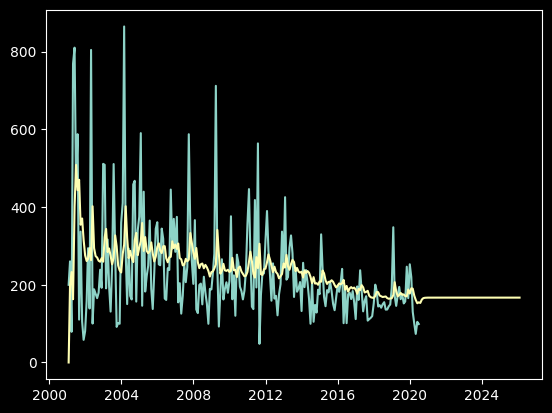

In [63]:
plt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))
plt.plot(results.predict(strat=0,end=300))

q=2 is appropriate

In [64]:
"""from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"), order = (2,1,2),seasonal_order=(0,1,1,47),enforce_stationarity=False)
results = model.fit()
plt.plot(results.forecast(steps=200))
plt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))"""

'from statsmodels.tsa.statespace.sarimax import SARIMAX\n\nmodel = SARIMAX(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"), order = (2,1,2),seasonal_order=(0,1,1,47),enforce_stationarity=False)\nresults = model.fit()\nplt.plot(results.forecast(steps=200))\nplt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))'

In [65]:
"""from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"), order = (2,1,2),seasonal_order=(0,1,2,47),enforce_stationarity=False)
results = model.fit()
plt.plot(results.forecast(steps=200))
plt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))"""

'from statsmodels.tsa.statespace.sarimax import SARIMAX\n\nmodel = SARIMAX(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"), order = (2,1,2),seasonal_order=(0,1,2,47),enforce_stationarity=False)\nresults = model.fit()\nplt.plot(results.forecast(steps=200))\nplt.plot(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill"))'

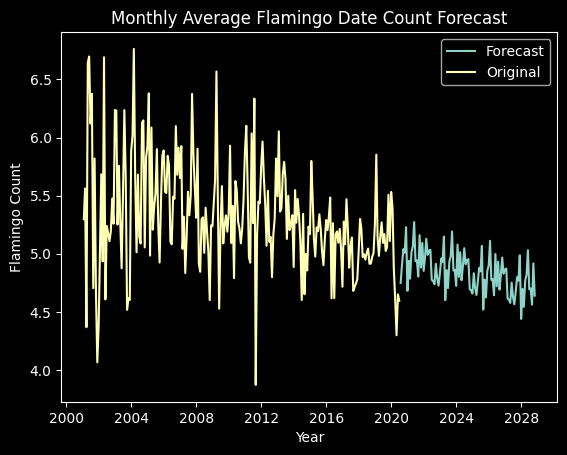

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(np.log(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")), order = (2,1,1),seasonal_order=(0,1,1,28),enforce_stationarity=False)
results = model.fit()
plt.plot(results.forecast(steps=100),label="Forecast")
plt.plot(np.log(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")),label="Original")
plt.title("Monthly Average Flamingo Date Count Forecast")
plt.xlabel("Year")
plt.ylabel("Flamingo Count")
plt.legend()

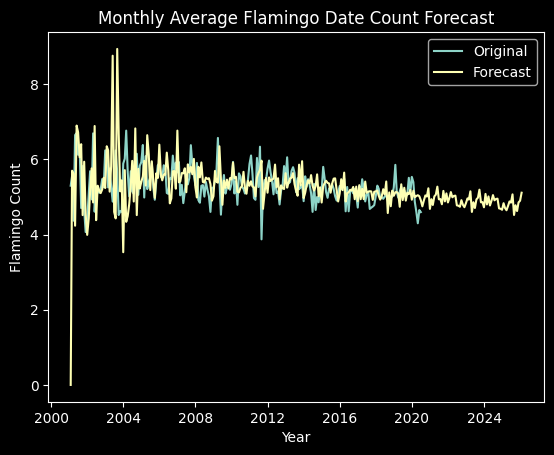

In [86]:

plt.plot(np.log(Flamingodata[Flamingodata["Date"]>"1960-01-01"].set_index("Date")["Count"].resample("M").mean().fillna(method="bfill")),label="Original")
plt.plot(results.predict(start=0,end=300),label="Forecast")
plt.title("Monthly Average Flamingo Date Count Forecast")
plt.xlabel("Year")
plt.ylabel("Flamingo Count")
plt.legend()

Use logged y axis instead as is more noticeable this way

<h3> must do location based analysis

In [68]:
Flamingodata["Year"] = Flamingodata["Date"].dt.year
Flamingodata["Month"] = Flamingodata["Date"].dt.month

changeperyear = pd.pivot_table(data=Flamingodata,index=Flamingodata["Country"],columns="Year",values="Count",aggfunc="mean").pct_change(axis=1).dropna(how="all").fillna(0) * 100

def changelookup_year(country,Year_Lower,Year_Upper):
    return changeperyear.loc[country,Year_Lower:Year_Upper]
    


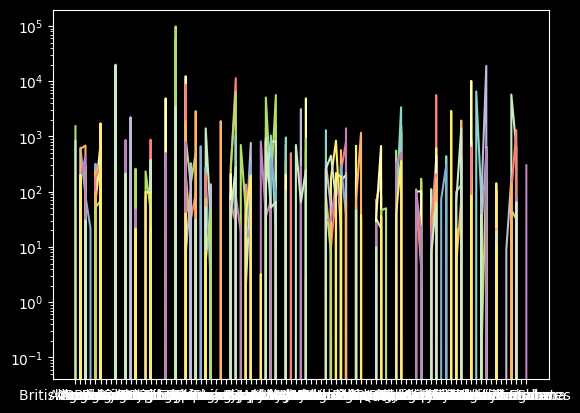

In [69]:
plt.plot(changeperyear)
plt.yscale("log")

Text(0, 0.5, 'Average % Change')

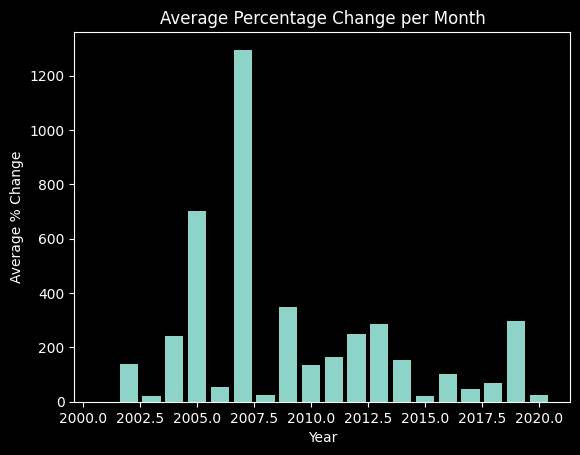

In [70]:
plt.bar(x = changeperyear.mean(axis=0).index,height=changeperyear.mean(axis=0))
#plt.axis([1960,2024,0,600])
plt.title("Average Percentage Change per Month")
plt.xlabel("Year")
plt.ylabel("Average % Change")

peaks are getting closer and closer together. more frequent mass population changes + more overall activity in recent years

due to more disruption? climate? 

Text(0, 0.5, '% Change')

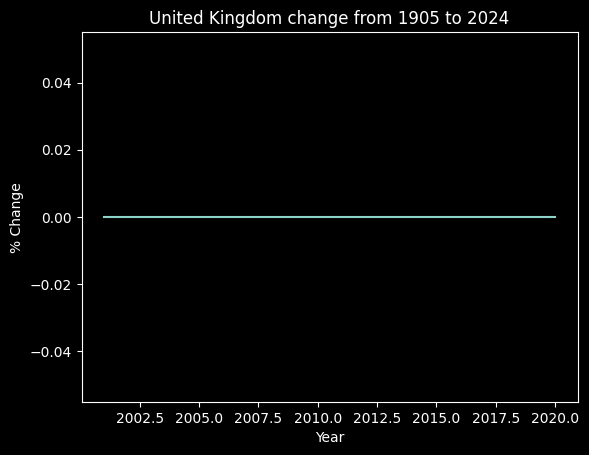

In [71]:
Country = "United Kingdom"
lower = 1905
upper = 2024
plt.plot(changelookup_year(Country,lower,upper))
plt.title(f"{Country} change from {lower} to {upper}")
plt.xlabel("Year")
plt.ylabel("% Change")

In [72]:
changepermonth = pd.pivot_table(data=Flamingodata,index=Flamingodata["Country"],columns="Month",values="Count",aggfunc="mean").pct_change(axis=1).dropna(how="all").fillna(0) * 100
def changelookup_month(country,Month_Lower,Month_Upper):
    return changepermonth.loc[country,Month_Lower:Month_Upper]
    

Text(0, 0.5, '% Change')

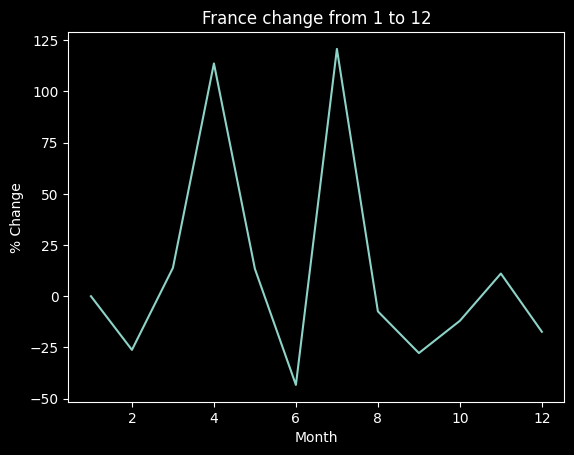

In [73]:
Country = "France"
lower = 1
upper = 12
plt.plot(changelookup_month(Country,lower,upper))
plt.title(f"{Country} change from {lower} to {upper}")
plt.xlabel("Month")
plt.ylabel("% Change")

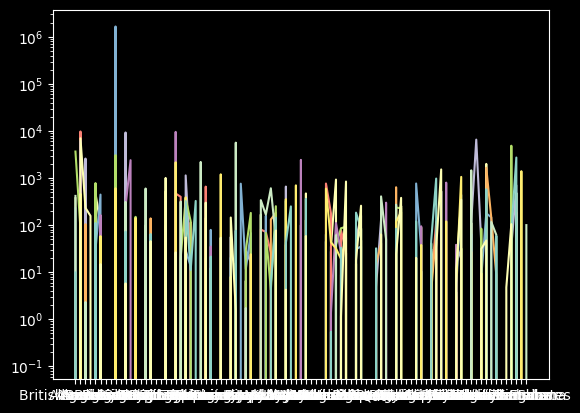

In [74]:
plt.plot(changepermonth)
plt.yscale("log")

Text(0, 0.5, 'Average % Change')

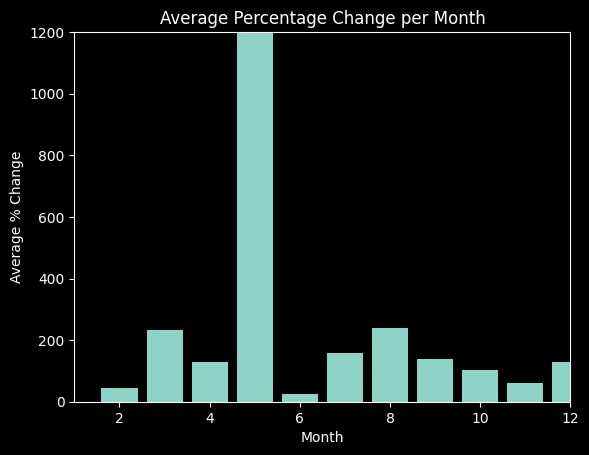

In [75]:
plt.bar(x = changepermonth.mean(axis=0).index,height=changepermonth.mean(axis=0))

plt.axis([1,12,0,1200])
plt.title("Average Percentage Change per Month")
plt.xlabel("Month")
plt.ylabel("Average % Change")

<BarContainer object of 91 artists>

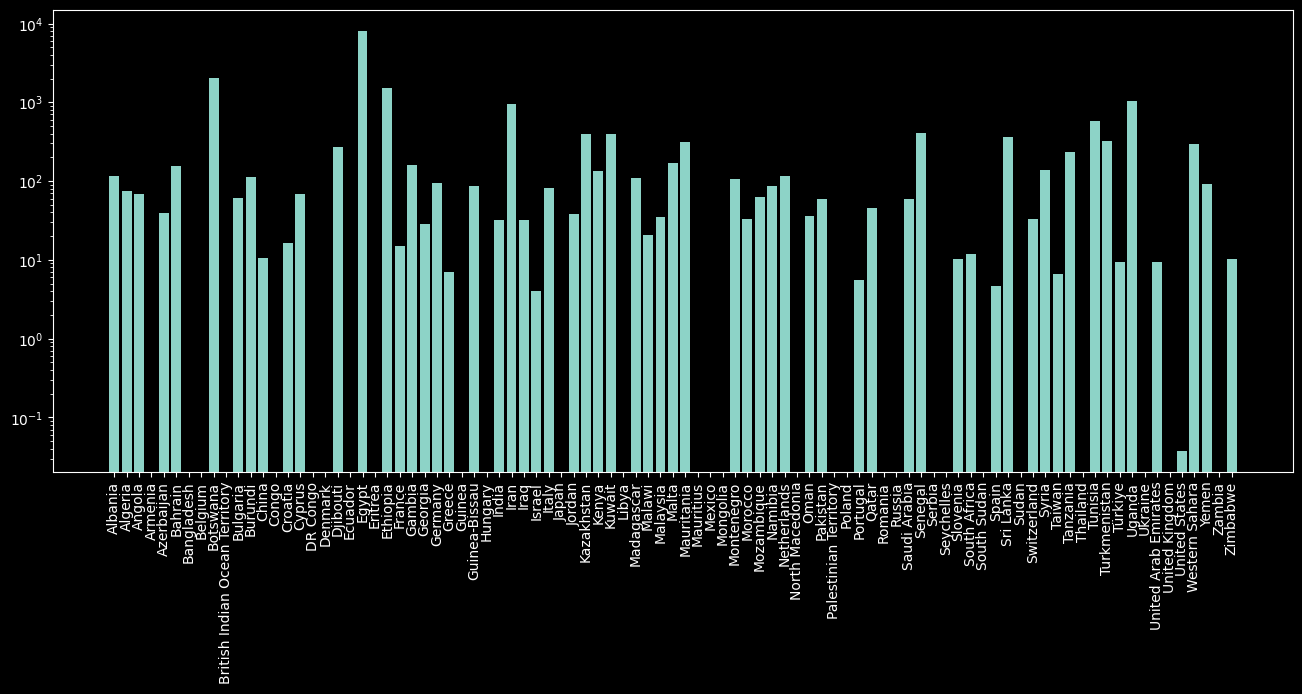

In [76]:
plt.figure(figsize=(16,6))
plt.yscale("log")
plt.xticks(rotation=90)
plt.bar(x=changeperyear.mean(axis=1).index,height=changeperyear.mean(axis=1))


<BarContainer object of 20 artists>

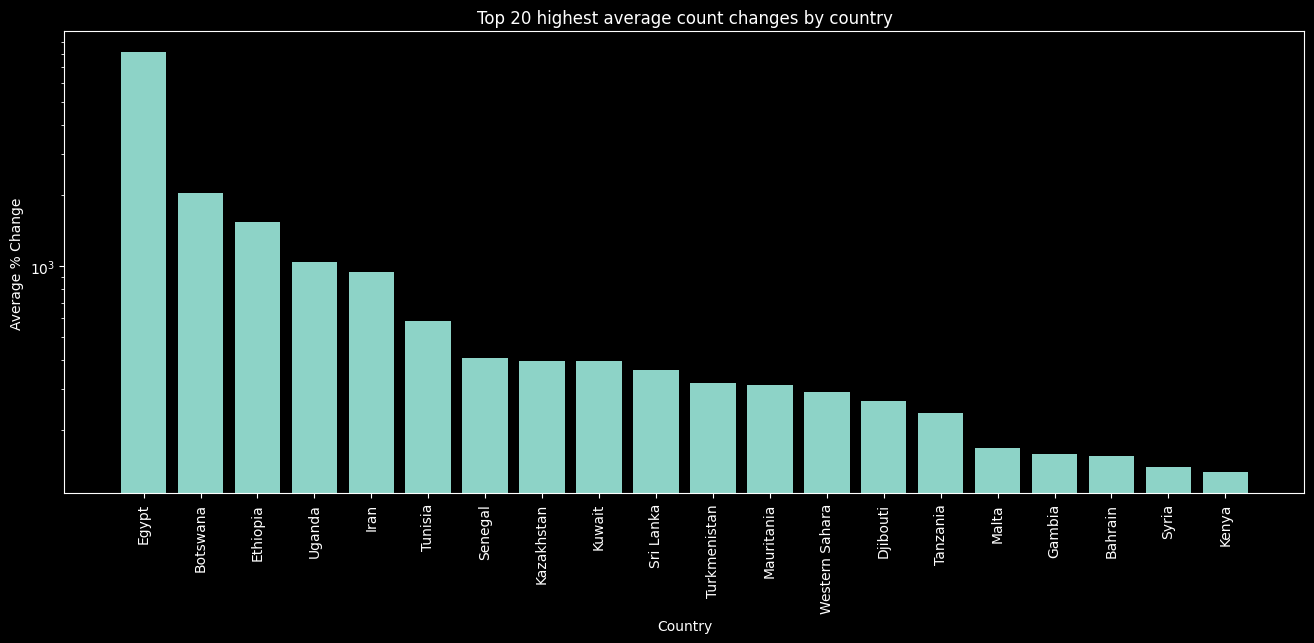

In [77]:

headcount = 20
plt.figure(figsize=(16,6))
plt.yscale("log")
plt.title(f"Top {headcount} highest average count changes by country")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average % Change")
plt.bar(x=changeperyear.mean(axis=1).sort_values(ascending=False).head(headcount).index,
        height=changeperyear.mean(axis=1).sort_values(ascending=False).head(headcount))


In [78]:
avgpositionbyyear = Flamingodata[["Year","Lat","Long"]].groupby("Year").mean()
avgpositionbymonth = Flamingodata[["Month","Lat","Long"]].groupby("Month").mean()

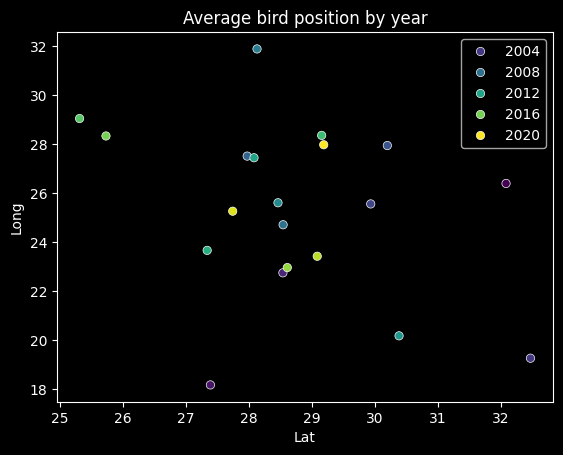

In [79]:
import seaborn as sns

sns.scatterplot(data=avgpositionbyyear,x="Lat",y="Long",hue="Year",palette="viridis")
plt.title("Average bird position by year")
plt.legend(loc="upper right")
#plt.axis([35,60,-20,40]) #ignoring outlier points

outwards points moving inwards over the years. More sightings appear in the centre over the yeras and less on the outer parts

In [80]:
errorperyear = 1 * Flamingodata[["Year","Lat","Long"]].groupby("Year").std().mean()
errorperyear

Lat     16.461446
Long    29.053245
dtype: float64

<Axes: title={'center': 'Average bird position by month'}, xlabel='Lat', ylabel='Long'>

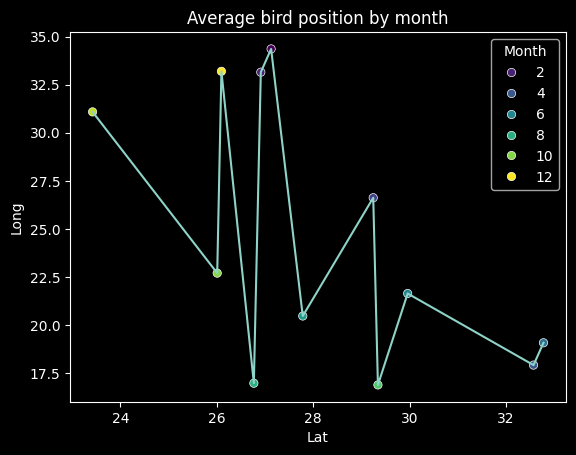

In [81]:
plt.title("Average bird position by month")
sns.lineplot(data=avgpositionbymonth,x="Lat",y="Long")

sns.scatterplot(data=avgpositionbymonth,x="Lat",y="Long",hue="Month",palette="viridis")

average migration path over the year? They seem to migrate from west to east

In [82]:
errorpermonth = 1 * Flamingodata[["Month","Lat","Long"]].groupby("Month").std().mean()
errorpermonth

Lat     17.054738
Long    30.480955
dtype: float64